In [307]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [308]:
os.getcwd()

'/workspace'

In [309]:
data = pd.read_csv('Crime_Clean.csv')

In [310]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Total Laborforce,Total Unemployed,Start_Date_Time,Location,Longitude,Latitude,High School %,Bachelors %,Public Transportation %,Unemployed %
0,50,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,1067.0,31.0,12/06/2019 09:16:00 PM,"(39.2006, -77.1996)",-77.199620,39.200626,0.083714,0.270167,0.049515,0.029053
1,51,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,1067.0,31.0,04/13/2019 02:00:00 AM,"(39.1977, -77.1997)",-77.199669,39.197675,0.083714,0.270167,0.049515,0.029053
2,52,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,1067.0,31.0,03/13/2020 09:09:00 AM,"(39.2081, -77.1748)",-77.174806,39.208137,0.083714,0.270167,0.049515,0.029053
3,53,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,1067.0,31.0,11/15/2019 04:33:00 PM,"(39.2025, -77.1848)",-77.184766,39.202456,0.083714,0.270167,0.049515,0.029053
4,54,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,1067.0,31.0,07/22/2016 10:27:00 PM,"(39.205, -77.1643)",-77.164342,39.204973,0.083714,0.270167,0.049515,0.029053


In [311]:
len(data)

235368

In [312]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
High School %                0
Bachelors %                  0
Public Transportation %      0
Unemployed %                 0
dtype: int64

In [313]:
data = data.drop('City',1)

In [314]:
data = data[~data['Crime Name1'].isnull()]

In [315]:
data.isnull().sum()

Unnamed: 0                 0
Incident ID                0
Police District Name       0
Block                      0
Crime Name1                0
Crime Name2                0
Crime Name3                0
Victims                    0
Place                      0
Pop                        0
Income                     0
Age                        0
Educational Attainment     0
Bachelors                  0
High School                0
Means of Transportation    0
Public Transportation      0
Total Laborforce           0
Total Unemployed           0
Start_Date_Time            0
Location                   0
Longitude                  0
Latitude                   0
High School %              0
Bachelors %                0
Public Transportation %    0
Unemployed %               0
dtype: int64

In [316]:
data = data[data['Crime Name1'] != 'Other']

In [317]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed','Longitude','Latitude', 'Crime Name2'],1)

In [318]:
data['Crime Name3'].value_counts().loc[lambda x: x > 1000]

LARCENY - FROM AUTO                           20699
DRUGS - MARIJUANA - POSSESS                   14408
ASSAULT - 2ND DEGREE                          12724
LARCENY - SHOPLIFTING                         12145
DRIVING UNDER THE INFLUENCE LIQUOR            11747
LARCENY (DESCRIBE OFFENSE)                     9687
DAMAGE PROPERTY - PRIVATE                      9123
LARCENY - FROM BLDG                            8310
IDENTITY THEFT                                 4896
LIQUOR - POSSESS                               4411
PUBLIC PEACE - DISORDERLY CONDUCT              4318
AUTO THEFT - VEHICLE THEFT                     4149
LARCENY - AUTO PARTS                           4056
TRESPASSING                                    3378
FRAUD - ILLEGAL USE CREDIT CARDS               3358
DAMAGE PROPERTY (DESCRIBE OFFENSE)             3146
JUVENILE - RUNAWAY                             2817
ASSAULT - SIMPLE                               2792
BURGLARY - FORCED ENTRY-RESIDENTIAL            2710
FRAUD (DESCR

In [319]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'High School %', 'Bachelors %',
       'Public Transportation %', 'Unemployed %'],
      dtype='object')

In [320]:
data.shape

(187827, 16)

In [321]:
data['Place'].value_counts().loc[lambda x: x > 1000]

Street - In vehicle                   27251
Residence - Single Family             14706
Residence - Apartment/Condo           14260
Street - Residential                  13815
Other/Unknown                         11922
Parking Lot - Residential             11026
Residence - Driveway                   8425
Parking Lot - Commercial               7536
Residence -Townhouse/Duplex            6935
Retail - Department/Discount Store     5918
Street - Commercial                    5208
School/College                         4215
Retail - Mall                          4067
Restaurant                             3883
Grocery/Supermarket                    3748
Street - Other                         3503
Retail - Other                         2798
Residence - Other                      2535
Convenience Store                      2267
Residence - Yard                       2140
Commercial - Office Building           2024
Parking Garage - Residential           1690
Street - Bus Stop               

In [322]:
places = data['Place'].value_counts().loc[lambda x: x > 1000]

top_places = list(places.index.values)

data = data[data['Place'].isin(top_places)]

In [323]:
data['Crime Name1'].value_counts()

Crime Against Property    93062
Crime Against Society     55584
Crime Against Person      19934
Not a Crime                2748
Name: Crime Name1, dtype: int64

In [324]:
data= data[data['Crime Name1'] != 'Not a Crime']

In [325]:
data = pd.get_dummies(data, prefix = ['Place','Police District Name'], columns = ['Place','Police District Name'])

In [326]:
data.shape

(168580, 54)

In [327]:
features = data[data.columns[~data.columns.isin(['Incident ID','Block','Crime Name3','Crime Name1','Location','Start_Date_Time'])]]

In [328]:
data = data.drop(['Crime Name1'], 1)

In [329]:
data['Crime Name3'].value_counts().loc[lambda x: (x < 1000) & (x > 300)]

RAPE - STRONG-ARM                                     880
BURGLARY - FORCED ENTRY-NONRESIDENTIAL                878
FRAUD - SWINDLE                                       862
DRUGS - MARIJUANA - SELL                              805
ASSAULT - AGGRAVATED - NON-FAMILY-OTHER WEAPON        711
WEAPON - POSSESSION                                   664
UNAUTHORIZED USE OF VEHICLE (INCLUDES JOY RIDING)     649
FORGERY OF CHECKS                                     622
DRUGS - OPIUM OR DERIVATIVE - POSSESS                 621
OBSTRUCT POLICE - RESISTING OFFICER                   614
ROBBERY - STREET-STRONG-ARM                           609
DRIVING UNDER THE INFLUENCE DRUGS                     592
WEAPON - CONCEALED                                    571
ASSAULT - AGGRAVATED - FAMILY-OTHER WEAPON            569
DRUGS - COCAINE - SELL                                522
LARCENY - POSTAL                                      481
DAMAGE PROPERTY - PUBLIC                              470
DRUGS - HEROIN

In [330]:
data['Crime Name3'].value_counts().loc[lambda x: x > 1000]

LARCENY - FROM AUTO                           19788
DRUGS - MARIJUANA - POSSESS                   13940
DRIVING UNDER THE INFLUENCE LIQUOR            11682
ASSAULT - 2ND DEGREE                          11566
LARCENY - SHOPLIFTING                         11063
DAMAGE PROPERTY - PRIVATE                      8629
LARCENY (DESCRIBE OFFENSE)                     8447
LARCENY - FROM BLDG                            6536
IDENTITY THEFT                                 4599
LIQUOR - POSSESS                               3936
AUTO THEFT - VEHICLE THEFT                     3796
LARCENY - AUTO PARTS                           3789
PUBLIC PEACE - DISORDERLY CONDUCT              3621
FRAUD - ILLEGAL USE CREDIT CARDS               3067
TRESPASSING                                    2874
DAMAGE PROPERTY (DESCRIBE OFFENSE)             2865
BURGLARY - FORCED ENTRY-RESIDENTIAL            2525
ASSAULT - SIMPLE                               2507
FRAUD (DESCRIBE OFFENSE)                       1783
DRUGS - NARC

In [331]:
import re

In [332]:
pattern1 = r'.*\s*(ASSAULT|RAPE|BLDG|OBSTRUCT GOVT|SEX|FAMILY|FORCED|COMMUNICATION|TRESPASSING|LARCENY \(DESCRIBE OFFENSE\))\.*'
pattern2 = r'.*\s*(DRUGS|INFLUENCE|LIQUOR|OBSTRUCT POLICE|WEAPON)\.*'
pattern3 = r'.*\s*(FRAUD|IDENTITY|FORGERY|EMBEZZLE)\.*'
pattern4 = r'.*\s*(DAMAGE PROPERTY|AUTO|DISORDERLY CONDUCT|ROBBERY)\.*'
pattern5 = r'.*\s*(SHOPLIFTING|MALLS|POCKET|PURSE|COUNTERFEITING)\.*'

for i, rowseries in data.iterrows():
    if re.match(pattern1, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Assault/Burglary/Residential Theft'
    elif re.match(pattern2, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Drugs/DUI/Weapon'
    elif re.match(pattern3, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Fraud'
    elif re.match(pattern4, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Auto Theft/Property Damage/Robbery/Disorderly Conduct'
    elif re.match(pattern5, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Theft from Store/Pocket Picking/Counterfeit'
    else:
        data.at[i,'Crime Type'] = 'All Other Offenses'


In [333]:
data['Crime Type'].value_counts()

Assault/Burglary/Residential Theft                       46410
Auto Theft/Property Damage/Robbery/Disorderly Conduct    46355
Drugs/DUI/Weapon                                         42938
Fraud                                                    15063
Theft from Store/Pocket Picking/Counterfeit              12644
All Other Offenses                                        5170
Name: Crime Type, dtype: int64

In [334]:
rand = data[['Crime Name3','Crime Type']]
rand = data[data['Crime Type'] == 'All Other Offenses']
rand['Crime Name3'].value_counts().loc[lambda x: x > 100]

ALL OTHER OFFENSES                                   1213
UNAUTHORIZED USE OF VEHICLE (INCLUDES JOY RIDING)     649
LARCENY - POSTAL                                      481
LARCENY - FROM YARDS                                  431
BURGLARY (DESCRIBE OFFENSE)                           307
FUGITIVE FROM MD JURISDICTION                         214
FUGITIVE FROM JUSTICE (OUT OF STATE)                  186
STOLEN VEHICLE (DESCRIBE OFFENSE)                     186
PUBLIC PEACE (DESCRIBE OFFENSE)                       157
Name: Crime Name3, dtype: int64

In [335]:
data2 = data[data['Crime Type'] != 'All Other Offenses']
data2['Crime Type'].value_counts()

Assault/Burglary/Residential Theft                       46410
Auto Theft/Property Damage/Robbery/Disorderly Conduct    46355
Drugs/DUI/Weapon                                         42938
Fraud                                                    15063
Theft from Store/Pocket Picking/Counterfeit              12644
Name: Crime Type, dtype: int64

In [336]:
classes2 = data2['Crime Type'].value_counts()

top_classes = list(classes2.index.values)

In [337]:
top_classes = sorted(top_classes)
top_classes

['Assault/Burglary/Residential Theft',
 'Auto Theft/Property Damage/Robbery/Disorderly Conduct',
 'Drugs/DUI/Weapon',
 'Fraud',
 'Theft from Store/Pocket Picking/Counterfeit']

In [338]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data2['Crime Type'] = le.fit_transform(data2['Crime Type'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [339]:
features = data2[data2.columns[~data2.columns.isin(['Incident ID','Block','Crime Name3','Crime Type','Location','Start_Date_Time'])]]

In [340]:
features.shape

(163410, 48)

In [341]:
data2['Crime Type'].value_counts()

0    46410
1    46355
2    42938
3    15063
4    12644
Name: Crime Type, dtype: int64

In [342]:
labels2 = np.array(data2['Crime Type'])
features2 = np.array(features)

In [343]:
features2[0]

array([1.00000000e+00, 1.92200000e+03, 1.56250000e+05, 4.66000000e+01,
       8.37138508e-02, 2.70167428e-01, 4.95145631e-02, 2.90534208e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [344]:
labels2[0]

0

In [345]:
len(np.unique(labels2))

5

In [346]:
num_classes2= len(np.unique(labels2))

In [347]:
from sklearn.model_selection import train_test_split
train2, test2, train_labels2, test_labels2 = train_test_split(features2,labels2,test_size=0.25,random_state=4)

In [348]:
train2.shape

(122557, 48)

In [349]:
test2.shape

(40853, 48)

In [350]:
train_labels2.shape

(122557,)

In [351]:
test_labels2.shape

(40853,)

In [352]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [353]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')

scores = evaluate_model(test2, test_labels2, dummy)
print('Mean Accuracy:' + str(np.mean(scores)))

Mean Accuracy:0.28575624724092896


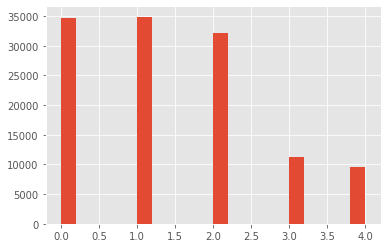

In [354]:
plt.hist(train_labels2, bins=20)
plt.show()

In [355]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=4)

X_sm, y_sm = smote.fit_resample(train2, train_labels2)

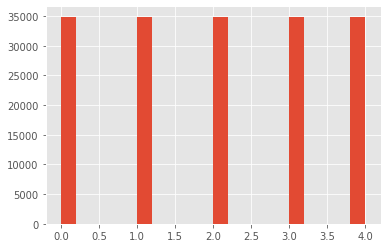

In [356]:
plt.hist(y_sm, bins=20)
plt.show()

In [357]:
smote2 = SMOTE('minority')

X_sm2, y_sm2 = smote2.fit_resample(train2, train_labels2)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


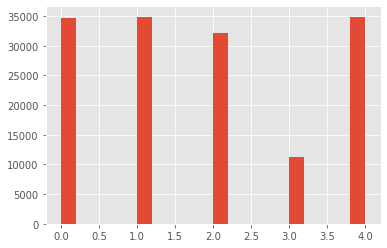

In [358]:
plt.hist(y_sm2, bins=20)
plt.show()

In [359]:
under = RandomUnderSampler('majority')

X_u, Y_u = under.fit_resample(train2, train_labels2)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


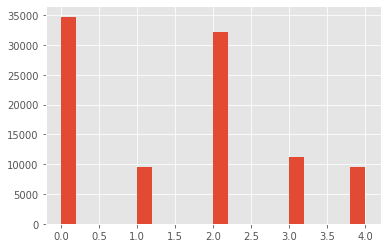

In [360]:
plt.hist(Y_u, bins=20)
plt.show()

In [361]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100,
                               random_state=4,
                               max_features='sqrt',
                               n_jobs=-1, verbose=1)
model2.fit(train2,train_labels2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=4,
                       verbose=1)

In [362]:
from sklearn.metrics import accuracy_score

predictions2 = model2.predict(test2)

print("Accuracy: " + str(accuracy_score(test_labels2, predictions2)))

Accuracy: 0.7024453528504638


[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [363]:
model2.fit(X_sm,y_sm)

predictions3 = model2.predict(test2)

print('Accuracy: ' + str(accuracy_score(test_labels2, predictions3)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


Accuracy: 0.6897412674711771


In [364]:
model2.fit(X_sm2,y_sm2)

predictions4 = model2.predict(test2)

print('Accuracy: ' + str(accuracy_score(test_labels2, predictions4)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.


Accuracy: 0.6997772501407485


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [365]:
model2.fit(X_u, Y_u)

predictions5 = model2.predict(test2)

print('Accuracy: ' + str(accuracy_score(test_labels2, predictions5)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.


Accuracy: 0.6694245220669228


[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [366]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': [None] + list(np.linspace(3,20).astype(int)),
    'max_features': ['auto','sqrt', None] + list(np.arange(0.5,1,0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10,50,500).astype(int)),
    'min_samples_split': [2,5,10],
    'bootstrap': [True,False]
}

estimator = RandomForestClassifier(random_state=4)

rs = RandomizedSearchCV(estimator, param_grid, n_jobs= -1,cv=3,
                       n_iter = 10, verbose = 1, random_state=4)

rs.fit(train2, train_labels2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                      

In [367]:
print(rs.best_params_)

{'n_estimators': 110, 'min_samples_split': 10, 'max_leaf_nodes': 37, 'max_features': None, 'max_depth': 19, 'bootstrap': False}


In [368]:
best_model = rs.best_estimator_

In [369]:
best_model.fit(train2,train_labels2)

RandomForestClassifier(bootstrap=False, max_depth=19, max_features=None,
                       max_leaf_nodes=37, min_samples_split=10,
                       n_estimators=110, random_state=4)

In [370]:
predictions6 = best_model.predict(test2)
accuracy_score(test_labels2, predictions6)

0.6984799157956576

In [371]:
importances2 = list(best_model.feature_importances_)
feature_list2 = list(features.columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances2]

Variable: Place_Street - In vehicle                Importance: 0.3245039402628008
Variable: Place_Other/Unknown                      Importance: 0.13564522529366313
Variable: Place_Parking Lot - Residential          Importance: 0.08489746802707364
Variable: Place_Street - Residential               Importance: 0.08389909639184386
Variable: Place_Residence - Driveway               Importance: 0.08139259635375871
Variable: Place_Retail - Department/Discount Store Importance: 0.053576268704408805
Variable: Victims                                  Importance: 0.03353961408585296
Variable: Place_Parking Lot - Commercial           Importance: 0.03140472601498791
Variable: Place_Retail - Mall                      Importance: 0.025653064592391913
Variable: Place_Street - Commercial                Importance: 0.025488588069215876
Variable: Place_Grocery/Supermarket                Importance: 0.022361692574950496
Variable: Place_Retail - Clothing                  Importance: 0.018986522128613854


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [372]:
top_importances2 = []
top_features_list2 = []

for x,y in feature_importances2:
    if(y > 0.025):
        top_features_list2.append(x)
        top_importances2.append(y)
top_features_list2

['Place_Street - In vehicle',
 'Place_Other/Unknown',
 'Place_Parking Lot - Residential',
 'Place_Street - Residential',
 'Place_Residence - Driveway',
 'Place_Retail - Department/Discount Store',
 'Victims',
 'Place_Parking Lot - Commercial',
 'Place_Retail - Mall',
 'Place_Street - Commercial']

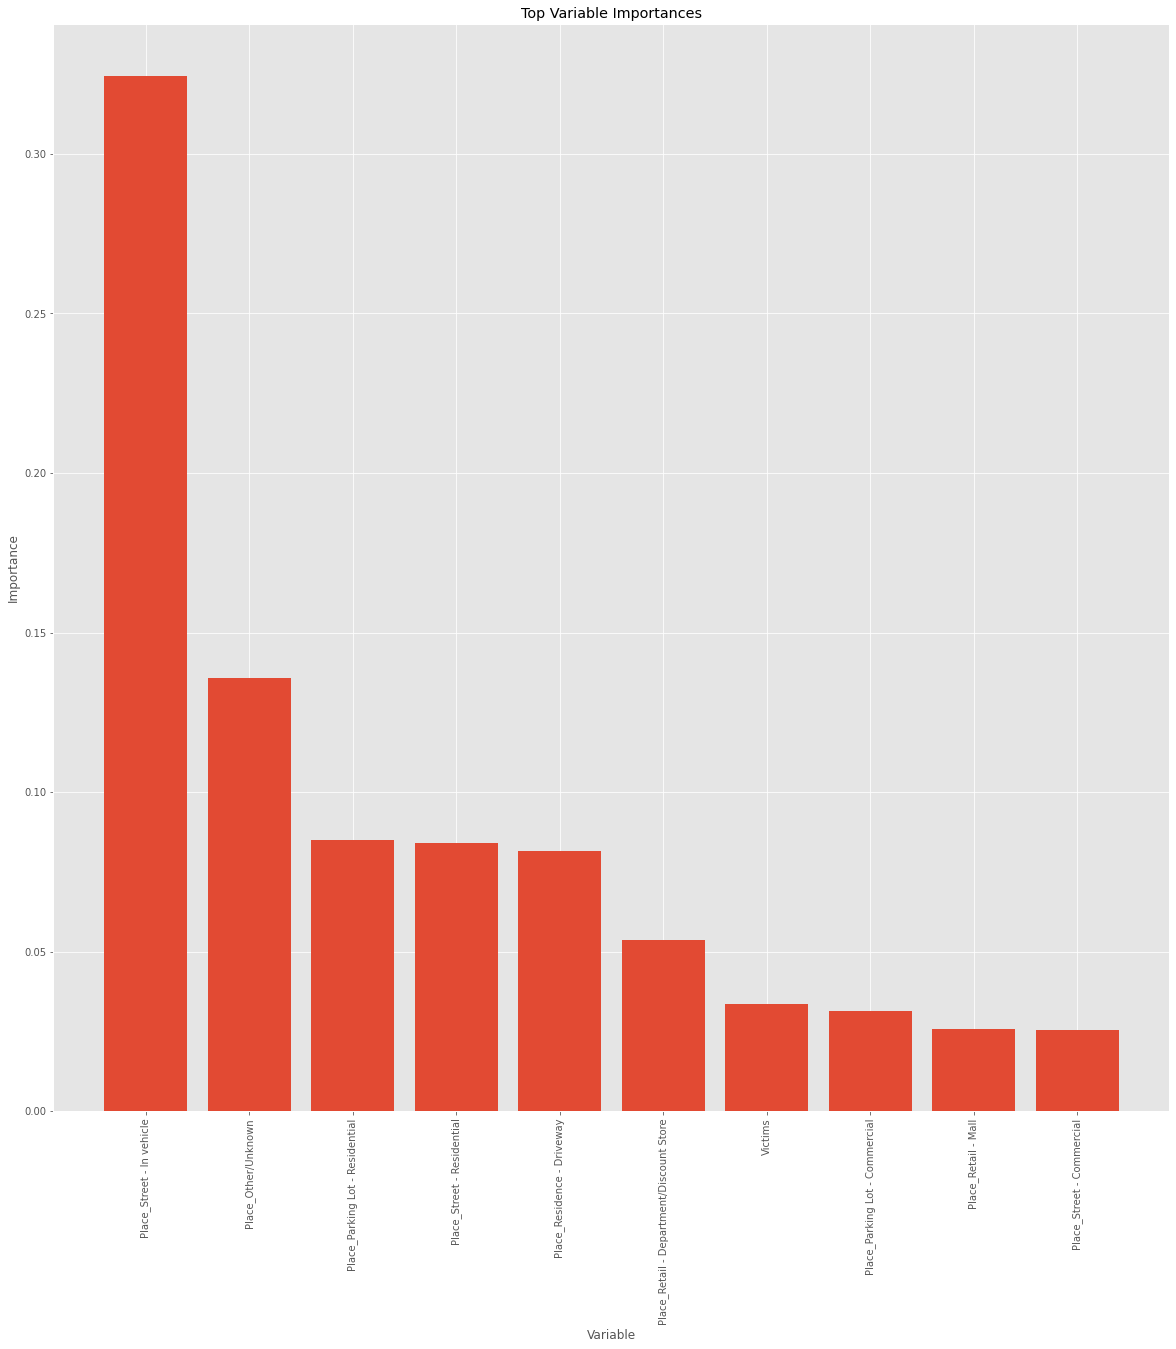

In [373]:
x_values2 = list(range(len(top_importances2)))
plt.bar(x_values2, top_importances2, orientation= 'vertical')
plt.xticks(x_values2, top_features_list2, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

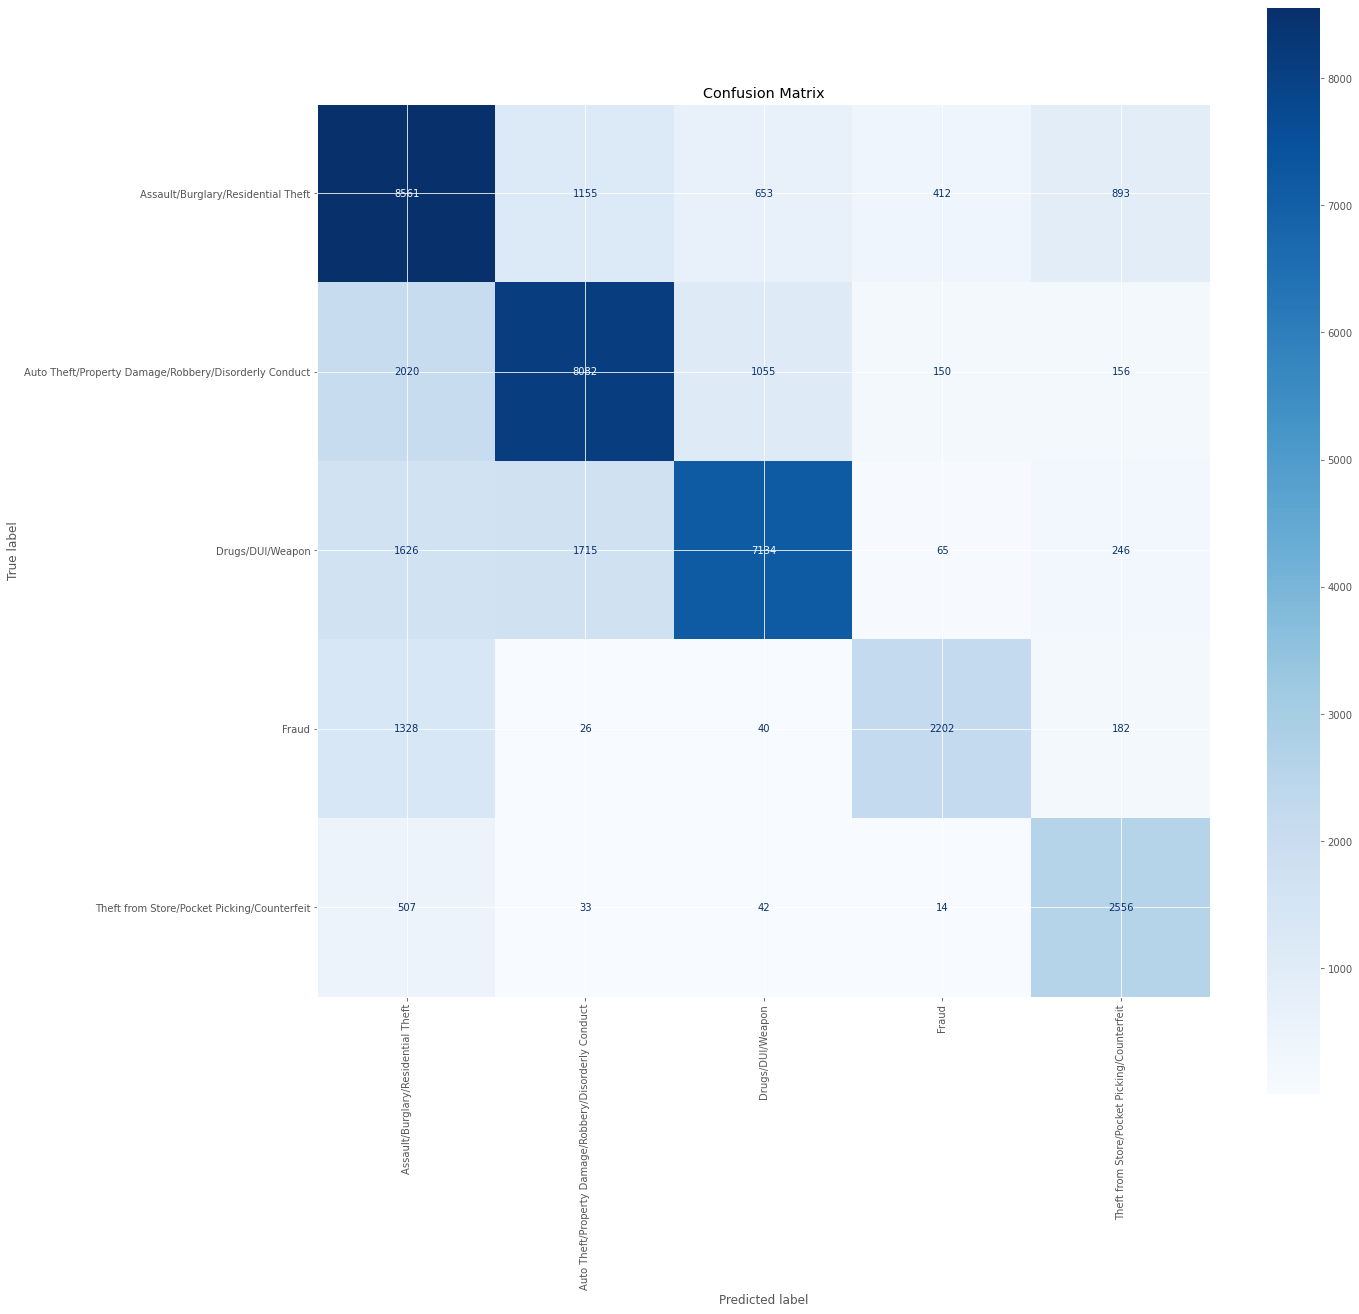

In [374]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_model, test2, test_labels2,display_labels=top_classes, cmap = plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [375]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

xgb = XGBClassifier(random_state=4, eval_metric='mlogloss', use_label_encoder=False)

param_grid2 = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': [None] + list(np.linspace(3,20).astype(int)),
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree' : [0.3, 0.5, 0.7]
}

rs2 = RandomizedSearchCV(xgb, param_grid2, cv=3,n_iter=5, random_state=4)

rs2.fit(train2, train_labels2)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'learning_rate': [0.01, 0.05, 0.1],
                            

In [376]:
print(rs2.best_params_)

{'n_estimators': 176, 'max_depth': 14, 'learning_rate': 0.01, 'colsample_bytree': 0.7}


In [377]:
best_model2 = rs2.best_estimator_
best_model2.fit(train2,train_labels2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=14, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=176, n_jobs=28,
              num_parallel_tree=1, objective='multi:softprob', random_state=4,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [378]:
predictions8 = best_model2.predict(test2)

accuracy_score(test_labels2, predictions8)

0.7095929307517196

In [379]:
importances3 = list(best_model2.feature_importances_)
feature_list3 = list(features.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances3]

Variable: Place_Street - In vehicle                Importance: 0.22154276072978973
Variable: Place_Other/Unknown                      Importance: 0.10513912886381149
Variable: Place_Residence - Driveway               Importance: 0.07425368577241898
Variable: Place_Parking Lot - Residential          Importance: 0.06271237879991531
Variable: Place_Retail - Department/Discount Store Importance: 0.05923693627119064
Variable: Place_Retail - Mall                      Importance: 0.05571126192808151
Variable: Place_Street - Residential               Importance: 0.05492589622735977
Variable: Place_Retail - Clothing                  Importance: 0.038133732974529266
Variable: Place_Residence - Single Family          Importance: 0.03756612166762352
Variable: Place_Grocery/Supermarket                Importance: 0.03669200837612152
Variable: Place_Residence - Apartment/Condo        Importance: 0.026274681091308594
Variable: Place_Residence -Townhouse/Duplex        Importance: 0.02249765582382679
Va

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [380]:
top_features_list3 = []
top_importances3 = []

for x,y in feature_importances3:
    if(y > 0.025):
        top_features_list3.append(x)
        top_importances3.append(y)

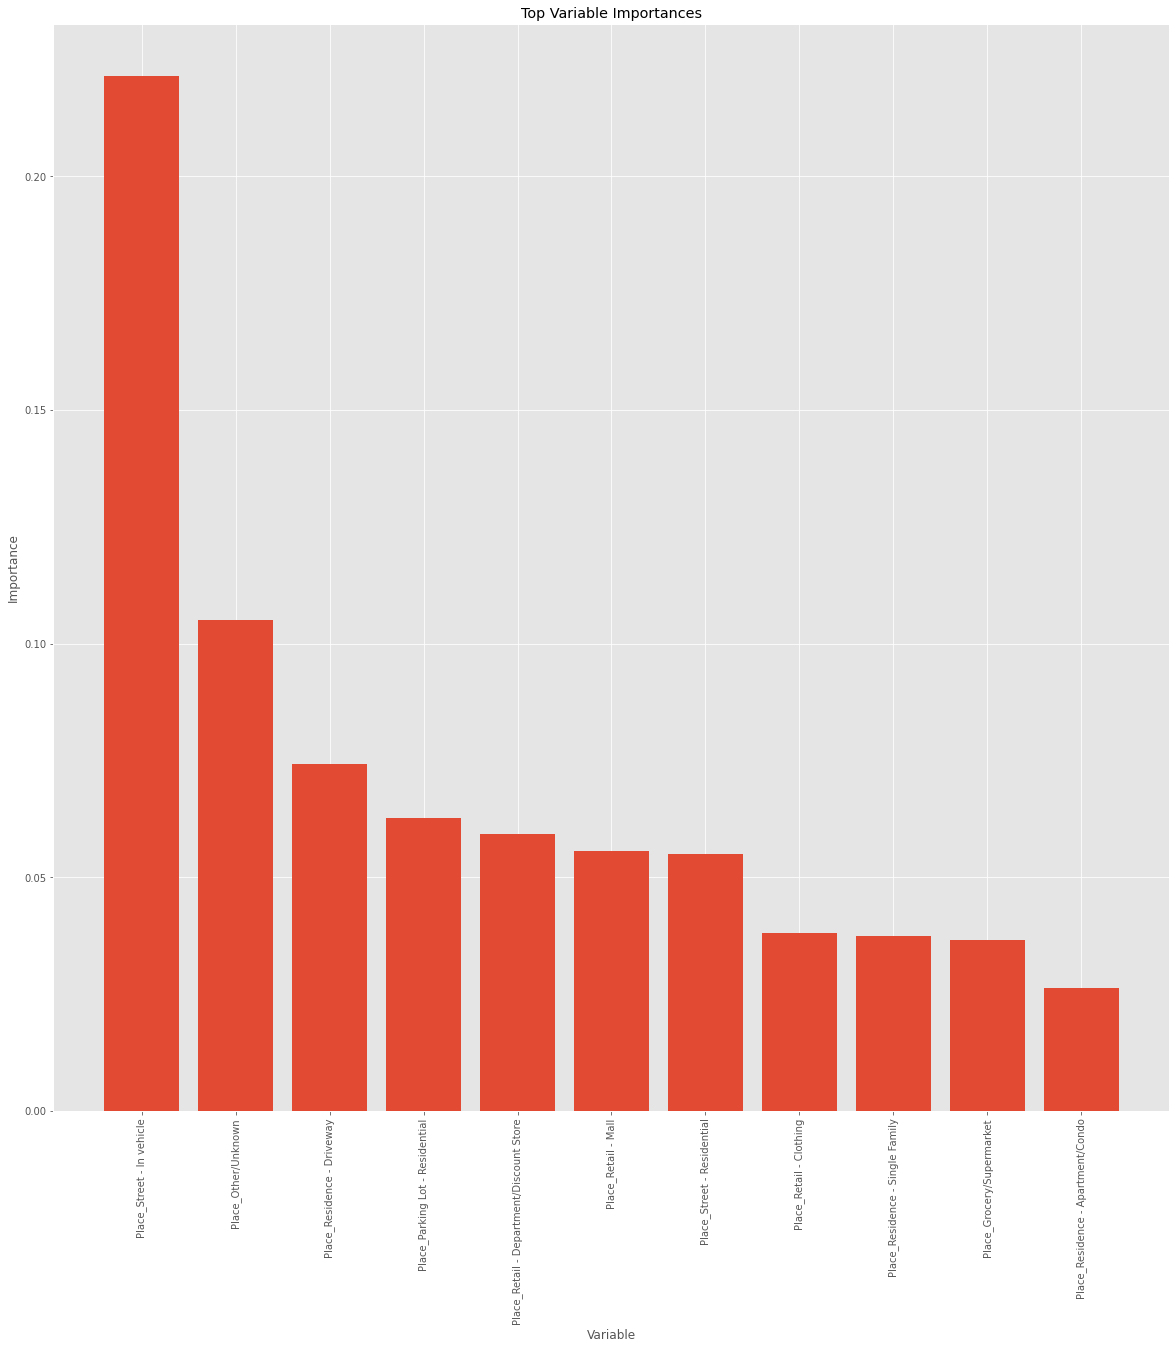

In [381]:
x_values3 = list(range(len(top_importances3)))
plt.bar(x_values3, top_importances3, orientation= 'vertical')
plt.xticks(x_values3, top_features_list3, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

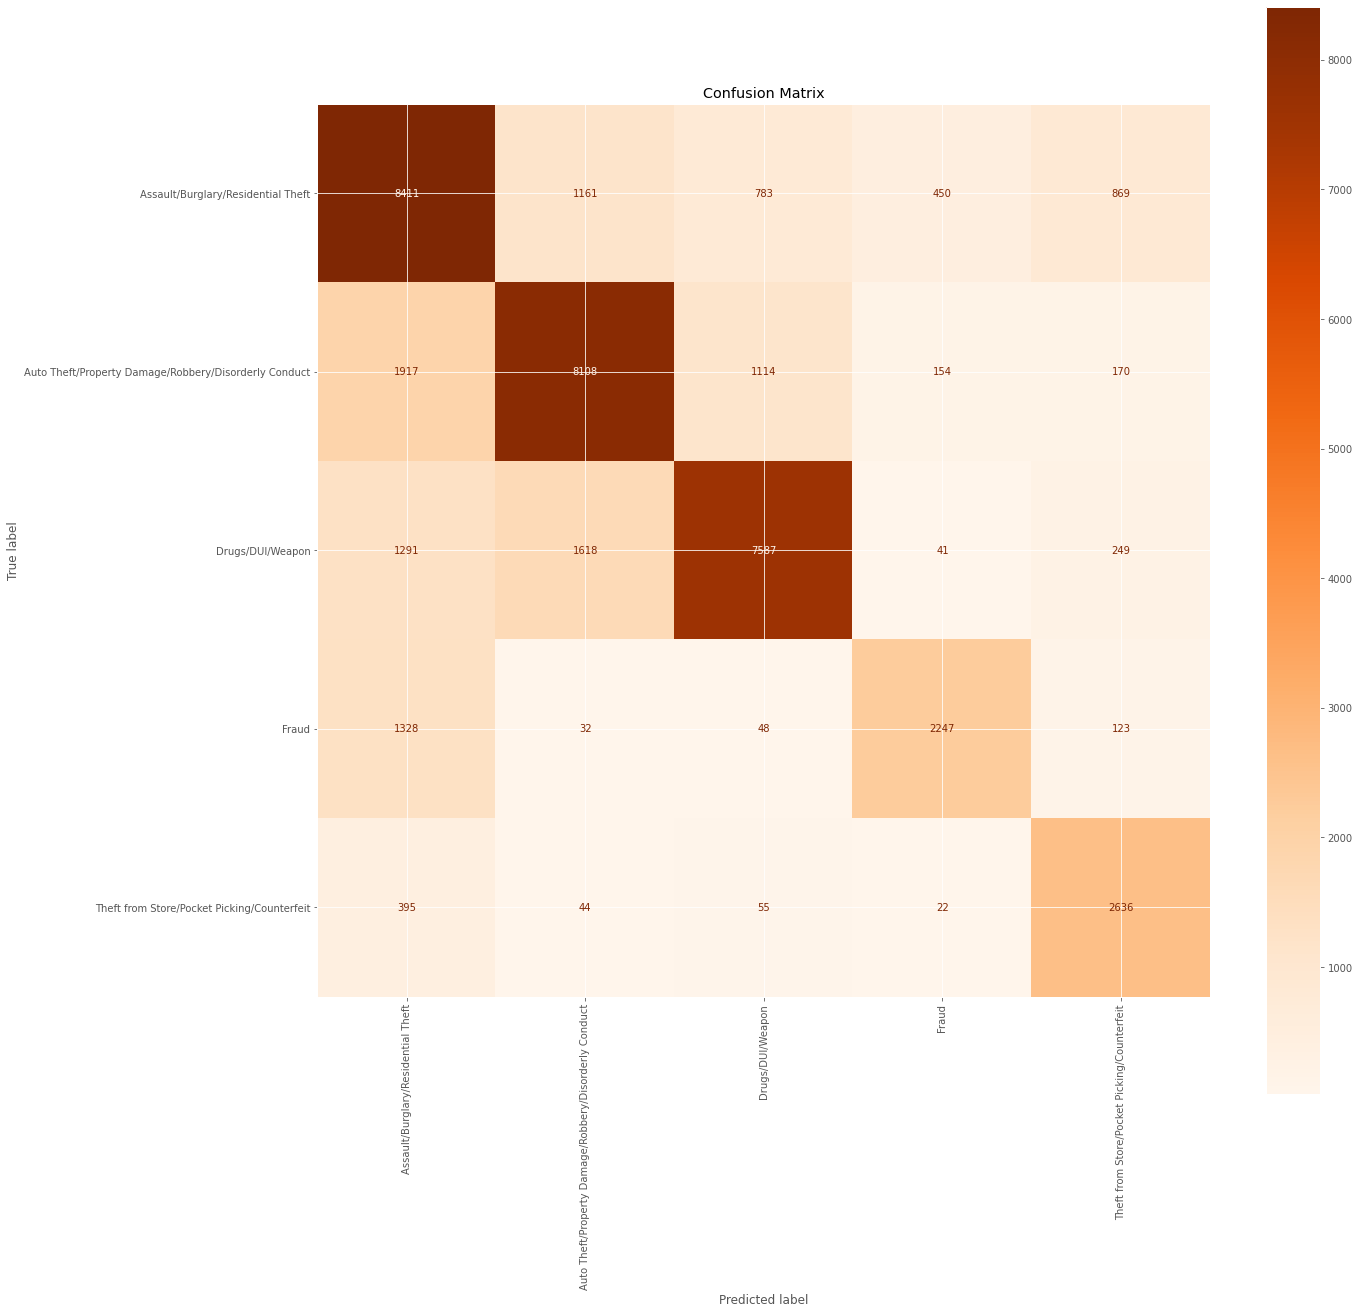

In [382]:
plot_confusion_matrix(best_model2, test2, test_labels2,display_labels=top_classes, cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.xticks(rotation=90)
plt.show()

In [383]:
lgbm = LGBMClassifier(random_state=4)

param_grid3 = {'n_estimators': np.linspace(0,200).astype(int),
              'max_depth': [None] + list(np.linspace(3,20).astype(int)),
              'learning_rate': [0.01, 0.1, 0.2],
               'bagging_fraction': [0.5,0.7,0.9],
               'feature_fraction': [0.5,0.7,0.9],
              }

rs3 = RandomizedSearchCV(lgbm, param_grid3, cv=3, n_iter=5)

rs3.fit(train2, train_labels2)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fractio

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=4), n_iter=5,
                   param_distributions={'bagging_fraction': [0.5, 0.7, 0.9],
                                        'feature_fraction': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'n_estimators': array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 102,
       106, 110, 114, 118, 122, 126, 130, 134, 138, 142, 146, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 200])})

In [384]:
print(rs3.best_params_)

{'n_estimators': 183, 'max_depth': 15, 'learning_rate': 0.1, 'feature_fraction': 0.7, 'bagging_fraction': 0.9}


In [385]:
best_model3 = rs3.best_estimator_
best_model3.fit(train2, train_labels2)

LGBMClassifier(bagging_fraction=0.9, feature_fraction=0.7, max_depth=15,
               n_estimators=183, random_state=4)

In [386]:
predictions8 = best_model3.predict(test2)

accuracy_score(test_labels2, predictions8)

0.7099845788558979

In [387]:
best_model3.feature_importances_

array([ 232, 2811, 2856, 2578, 2794, 2575, 2782, 2385,  180,  151,  126,
        193,  120,  293,  161,  168,  173,  229,  271,  179,  290,  266,
        261,  198,  323,  220,  227,  190,  128,  236,  151,  164,  201,
        263,  179,  261,  385,  238,  330,  237,  170,  196,  221,    0,
        294,  293,    0,  271], dtype=int32)

In [388]:
lgbm_importances = best_model3.feature_importances_/sum(best_model3.feature_importances_)
importances4 = list(lgbm_importances)
feature_list4 = list(features.columns)
feature_importances4 = [(feature, importance) for feature, importance in zip(feature_list4,importances4)]
feature_importances4 = sorted(feature_importances4, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances4]

Variable: Income                                   Importance: 0.10404371584699454
Variable: Pop                                      Importance: 0.10240437158469945
Variable: High School %                            Importance: 0.10178506375227686
Variable: Public Transportation %                  Importance: 0.10134790528233151
Variable: Age                                      Importance: 0.09391621129326047
Variable: Bachelors %                              Importance: 0.09380692167577413
Variable: Unemployed %                             Importance: 0.08688524590163935
Variable: Place_Street - In vehicle                Importance: 0.014025500910746813
Variable: Place_Street - Residential               Importance: 0.012021857923497269
Variable: Place_Residence - Single Family          Importance: 0.011766848816029143
Variable: Police District Name_ROCKVILLE           Importance: 0.010710382513661203
Variable: Place_Other/Unknown                      Importance: 0.010673952641165756

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [389]:
top_features_list4 = []
top_importances4 = []

for x,y in feature_importances4:
    if(y > 0.025):
        top_features_list4.append(x)
        top_importances4.append(y)

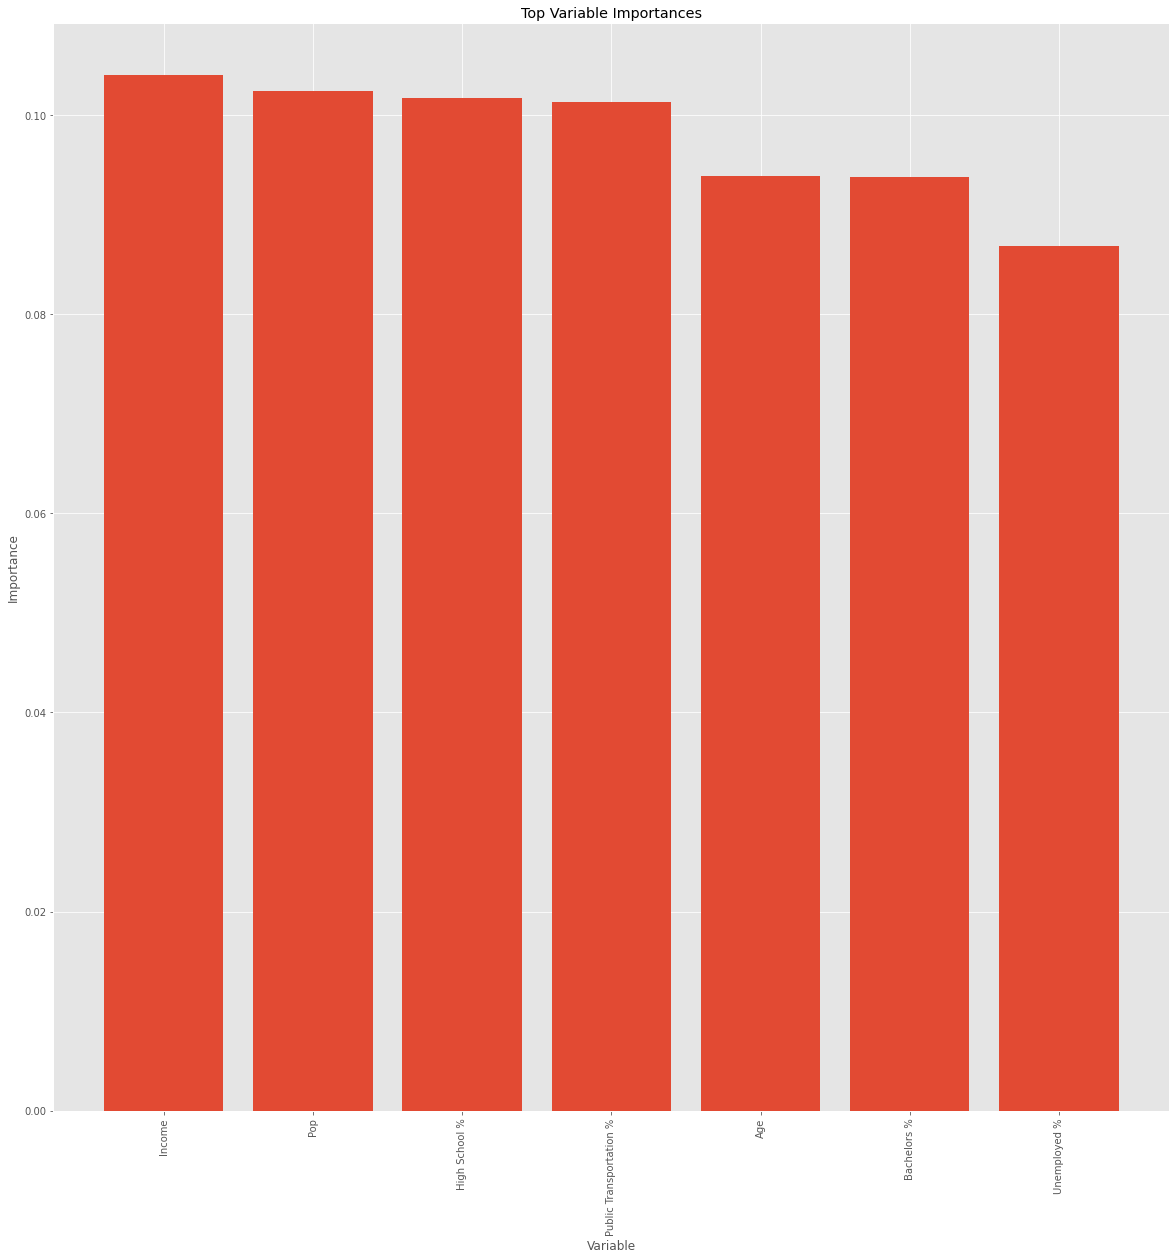

In [390]:
x_values4 = list(range(len(top_importances4)))
plt.bar(x_values4, top_importances4, orientation= 'vertical')
plt.xticks(x_values4, top_features_list4, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

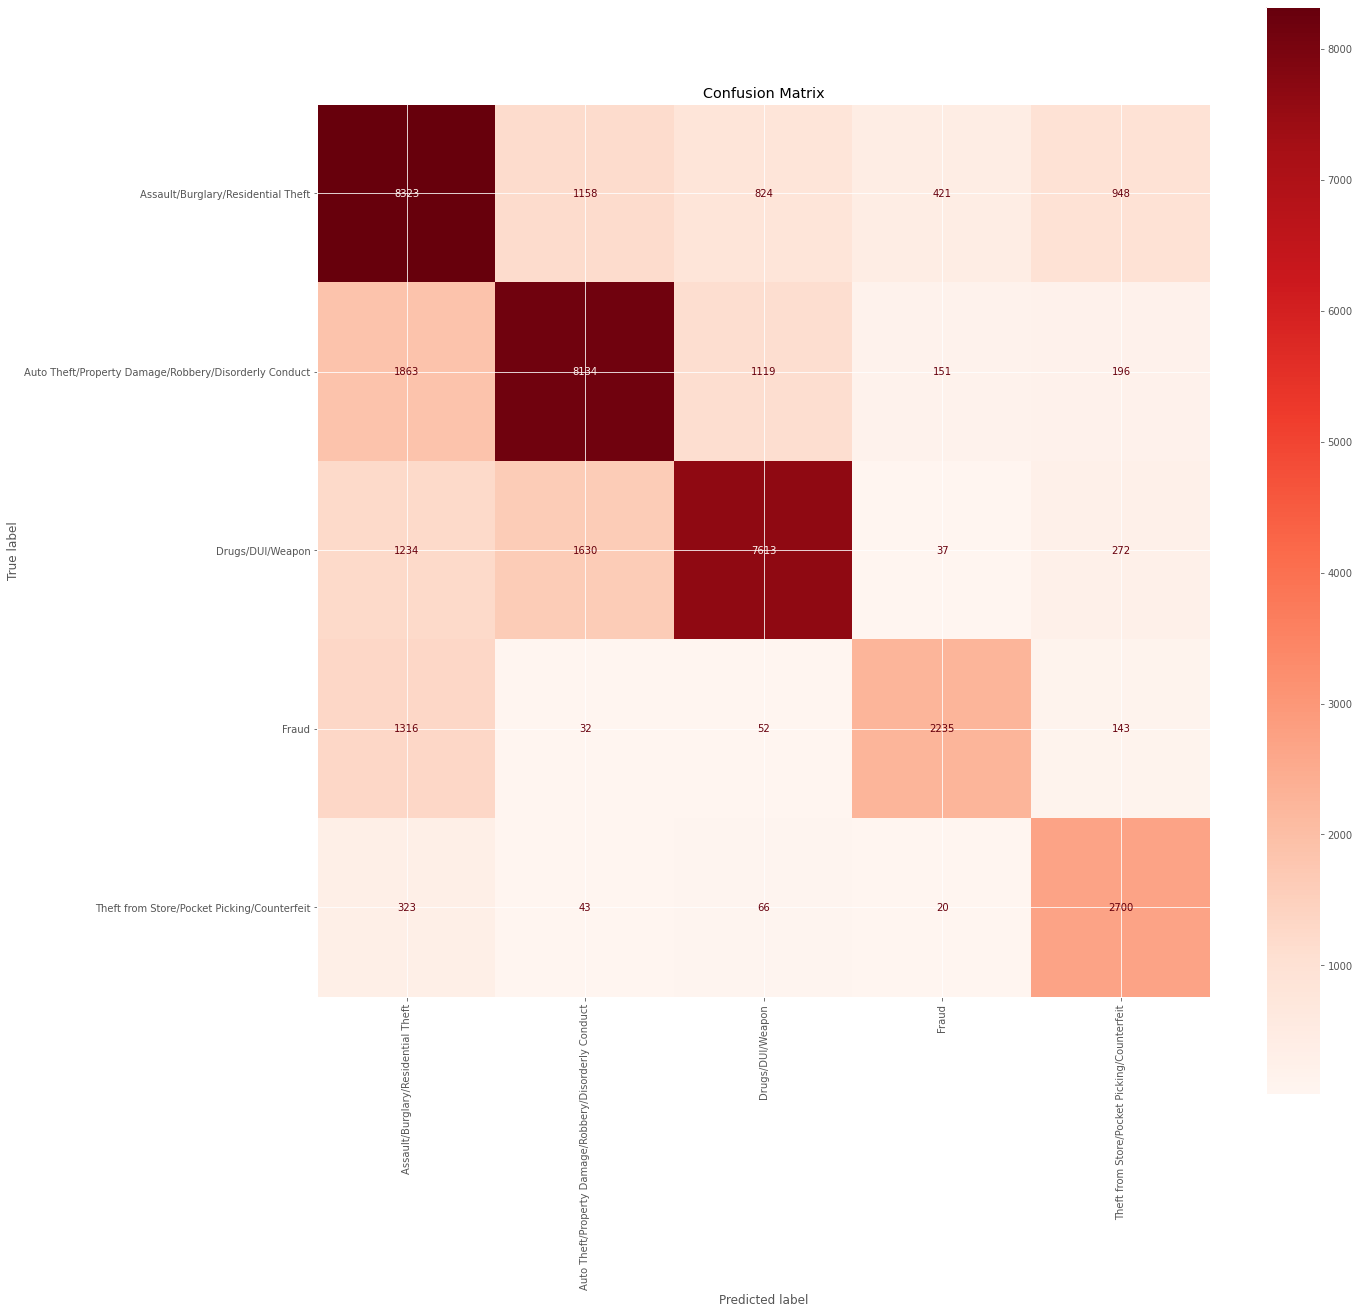

In [391]:
plot_confusion_matrix(best_model3, test2, test_labels2,display_labels=top_classes, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.xticks(rotation=90)
plt.show()

In [392]:
from sklearn.ensemble import VotingClassifier

estimators = [('rf', best_model),('xgbm', best_model2),('lgbm',best_model3)]

ensemble = VotingClassifier(estimators, voting='hard')

ensemble.fit(train2, train_labels2)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=19,
                                                     max_features=None,
                                                     max_leaf_nodes=37,
                                                     min_samples_split=10,
                                                     n_estimators=110,
                                                     random_state=4)),
                             ('xgbm',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.7,
                                            eval_metric='mlogloss', gamma=0,
                                            gpu_id=-1, importance_type='...
  

In [393]:
predictions_final = ensemble.predict(test2)

accuracy_score(test_labels2,predictions_final)

0.7098621888233422

In [394]:
ensemble.score(test2,test_labels2)

0.7098621888233422

In [395]:
y = preprocessing.label_binarize(data2['Crime Type'], classes=[0,1,2,3,4])

x_train, x_test, y_train, y_test = train_test_split(features2, y, test_size=0.25, random_state=4)

In [396]:
y.shape[1]

5

In [397]:
from sklearn.multiclass import OneVsRestClassifier

model_final = OneVsRestClassifier(LGBMClassifier(n_estimators=130,
                   random_state=4,
                   max_depth=14,
                    feature_fraction=0.9,
                    bagging_fraction=0.9         
                   ))

model_final.fit(x_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


OneVsRestClassifier(estimator=LGBMClassifier(bagging_fraction=0.9,
                                             feature_fraction=0.9, max_depth=14,
                                             n_estimators=130, random_state=4))

In [398]:
predictions_new = model_final.predict_proba(x_test)

In [399]:
y_test[:,1]

array([0, 0, 1, ..., 1, 1, 0])

In [400]:
predictions_new[:,1]

array([0.03009553, 0.16518257, 0.66131962, ..., 0.95772271, 0.90768722,
       0.01346829])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


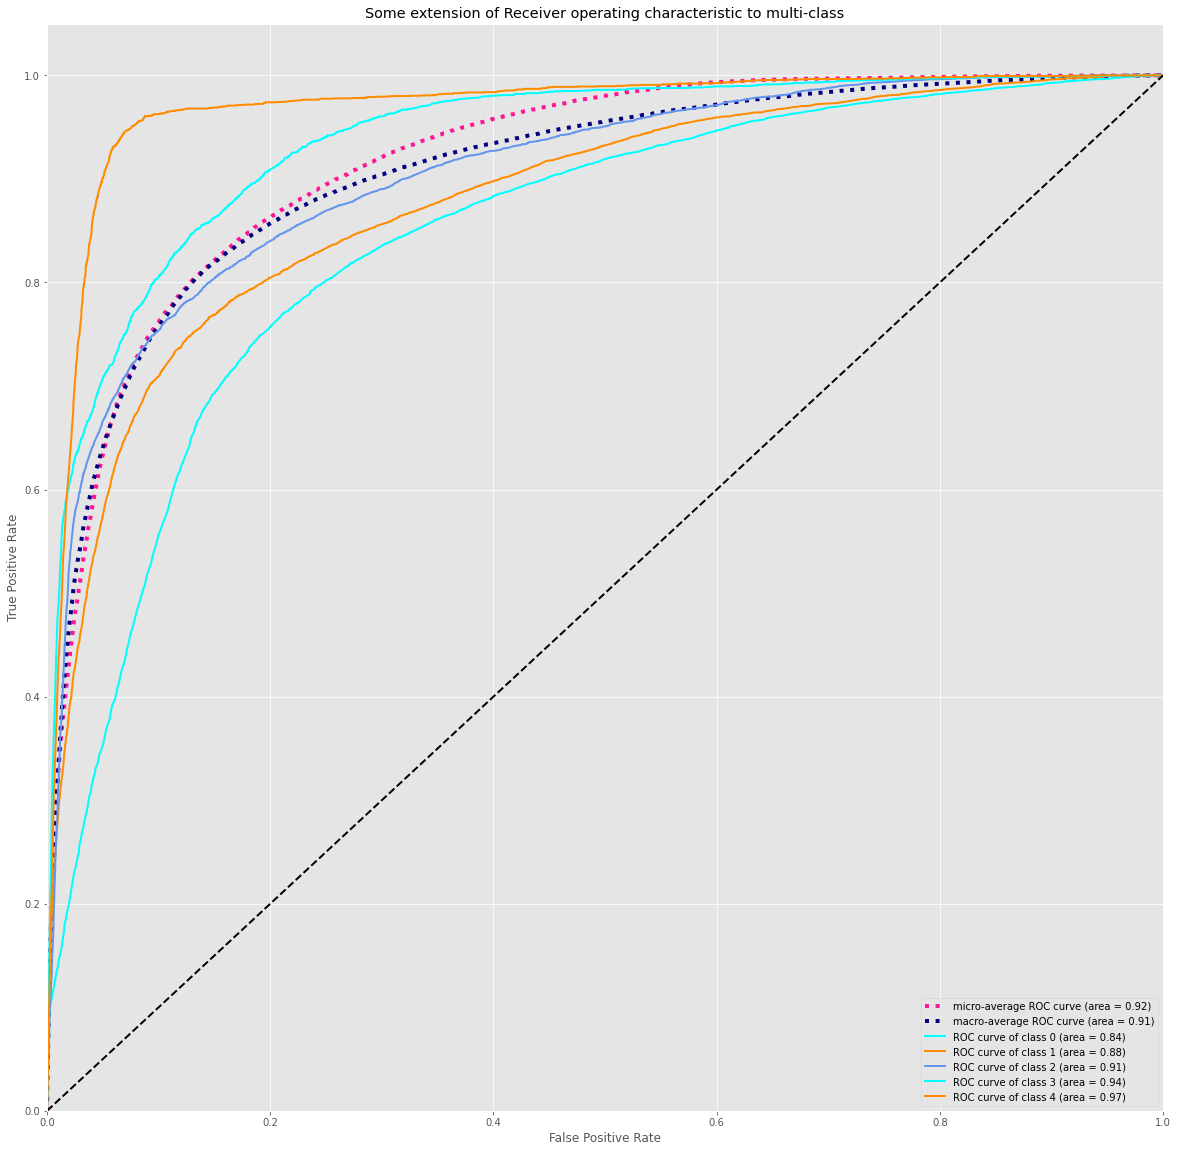

In [401]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(top_classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions_new[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions_new.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(top_classes))]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(top_classes)):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= len(top_classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(len(top_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [402]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(top_classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        predictions_new[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], predictions_new[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    predictions_new.ravel())
average_precision["micro"] = average_precision_score(y_test, predictions_new,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.77


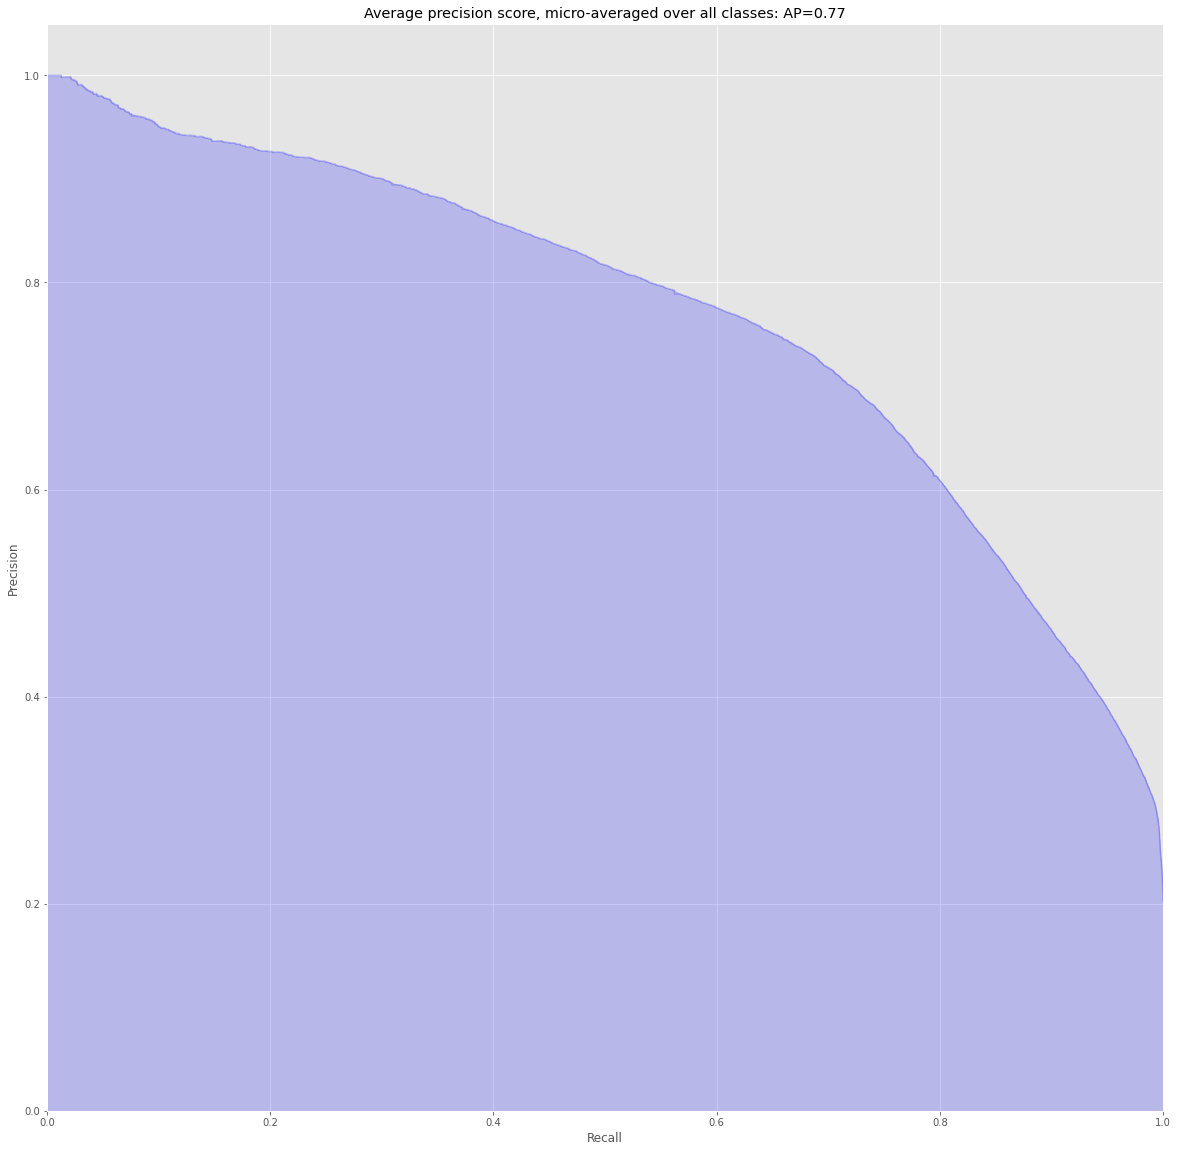

In [403]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')#,
                 #**step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
fig = plt.gcf()
fig.set_size_inches(20,20)

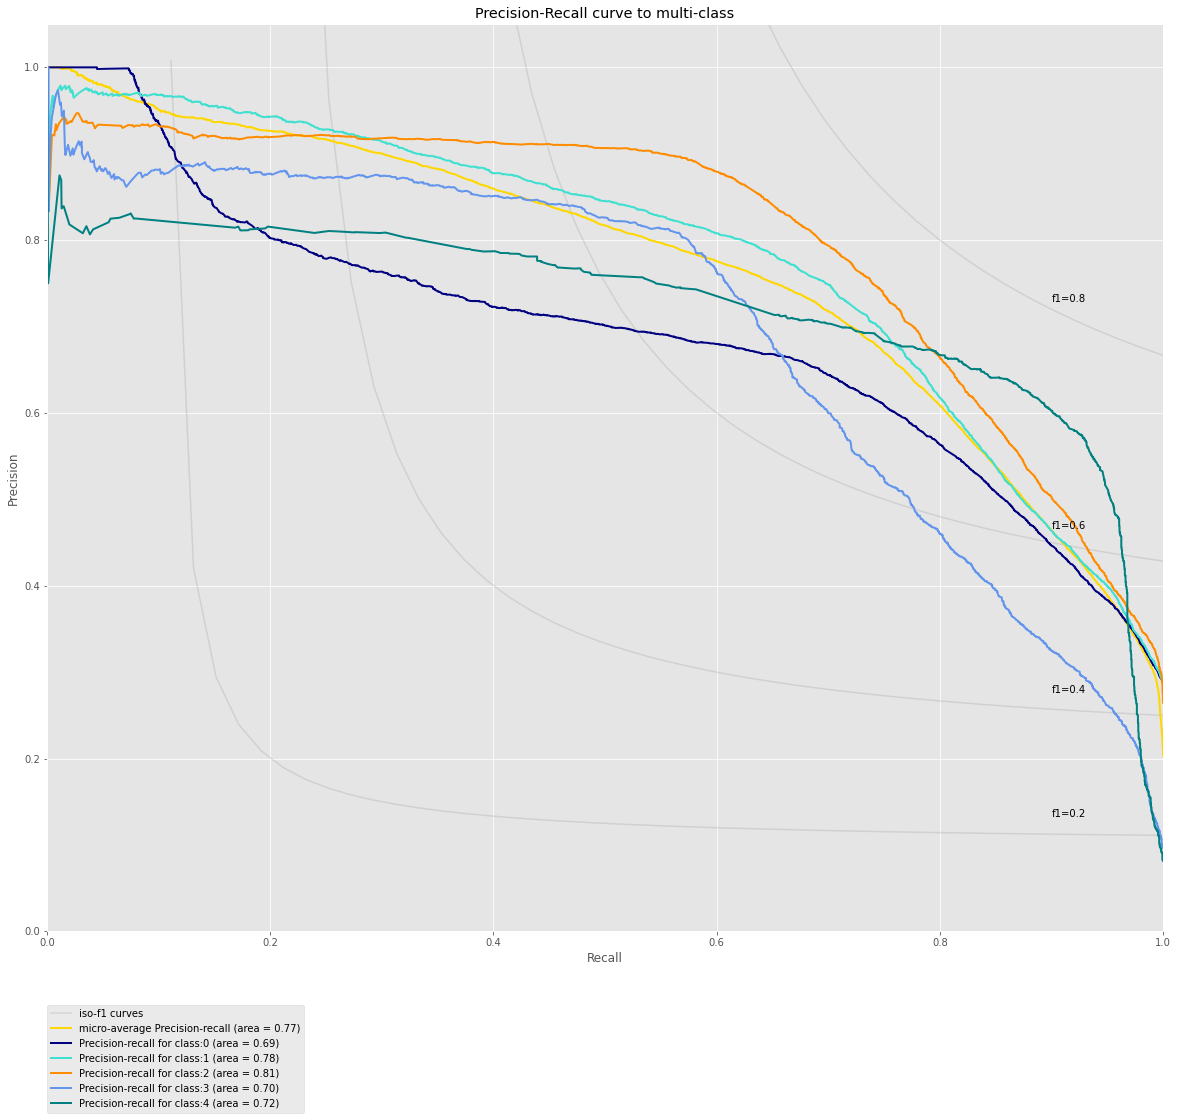

In [404]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(14, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(len(top_classes)), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class:{0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.2), prop=dict(size=10))
fig = plt.gcf()
fig.set_size_inches(20,20)

plt.show()

In [405]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovo = roc_auc_score(y_test, predictions_new, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, predictions_new, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, predictions_new, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, predictions_new, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.907460 (macro),
0.888714 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.907460 (macro),
0.888714 (weighted by prevalence)
